## **FMCG Warehouse: Optimizing Amazon's Distribution Efficiency**



#####**Background:**
You are a data analyst at Amazon, which has an extensive network of warehouses across various regions. The company is facing challenges in ensuring efficient warehouse operations, resulting in frequent stockouts, delays in deliveries, and increased operational costs. The management has tasked you with analyzing the data from these warehouses to identify key issues and provide actionable insights to enhance warehouse efficiency.

#####**Problem Statement**
Problem Statement: Amazon is experiencing inefficiencies in its warehouse operations. These inefficiencies are affecting the supply chain, leading to stockouts, delivery delays, and increased costs. Your task is to analyze warehouse data to uncover the root causes of these issues and propose data-driven solutions to optimize warehouse performance.

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/FMCG_data.csv")  #Loading the dataset
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [ ]:
df.isnull().sum() #checking for null values

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [ ]:
df.info() #checking for data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [ ]:
df.shape #checking for number of rows and columns

(25000, 24)

In [ ]:
df.columns #checking for columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

##**Data Analysis**

Q1-What is the average capacity size of the warehouses?

In [ ]:
cap_warehouse = df.groupby('WH_capacity_size')['Ware_house_ID'].nunique()
cap_warehouse

WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: Ware_house_ID, dtype: int64

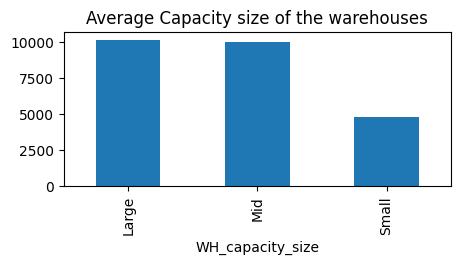

In [ ]:
cap_warehouse.plot(kind='bar', figsize=(5,2))
plt.title('Average Capacity size of the warehouses')
plt.show()

Q2- How many warehouses are located in urban areas versus rural areas?

In [ ]:
warehouse = df.groupby('Location_type')['Ware_house_ID'].nunique()
warehouse

Location_type
Rural    22957
Urban     2043
Name: Ware_house_ID, dtype: int64

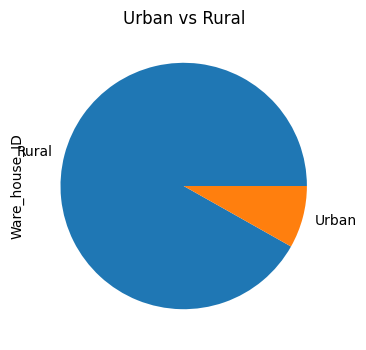

In [ ]:
warehouse.plot(kind='pie', figsize =(7,4))
plt.title('Urban vs Rural')
plt.show()

Q3-What is the total number of retail shops served by each zone?

In [ ]:
no_of_retail_shops = df.groupby('zone')['retail_shop_num'].nunique()
no_of_retail_shops

zone
East      415
North    3750
South    3145
West     3310
Name: retail_shop_num, dtype: int64

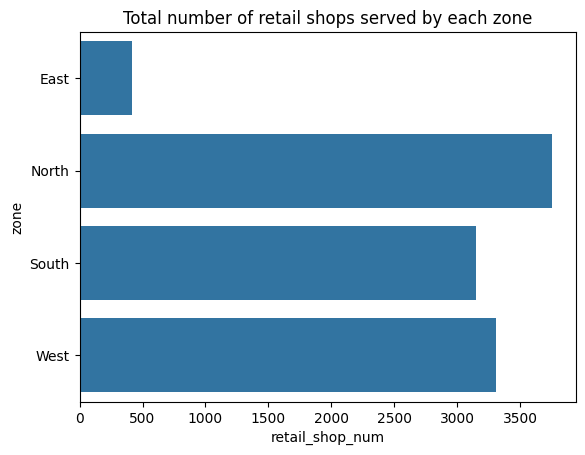

In [ ]:
sns.barplot(x =no_of_retail_shops,y = no_of_retail_shops.index)
plt.title('Total number of retail shops served by each zone')
plt.show()

Q4-Calculate the average number of workers per warehouse.

In [ ]:
avg_workers = df.groupby('Ware_house_ID')['workers_num'].mean()
avg_workers

Ware_house_ID
WH_100000    29.0
WH_100001    31.0
WH_100002    37.0
WH_100003    21.0
WH_100004    25.0
             ... 
WH_124995    34.0
WH_124996    28.0
WH_124997     NaN
WH_124998    25.0
WH_124999    39.0
Name: workers_num, Length: 25000, dtype: float64

Q5-Determine the percentage of warehouses with electric supply.

In [ ]:
warehouse = df.groupby('electric_supply')['Ware_house_ID'].nunique()
warehouse

electric_supply
0     8578
1    16422
Name: Ware_house_ID, dtype: int64

Here 0 means there is no power supply in warehouse
And 1 means there is power supply

In [ ]:
pct_warehouse = (warehouse/warehouse.sum())*100 #Here converting values into percentage
pct_warehouse

electric_supply
0    34.312
1    65.688
Name: Ware_house_ID, dtype: float64

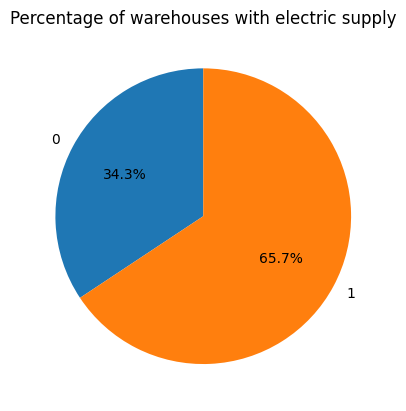

In [ ]:
plt.pie(pct_warehouse, labels=pct_warehouse.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of warehouses with electric supply')
plt.show()

Q6-What is the average distance of warehouses from the central distribution hub?

In [ ]:
Avg_distance = df.groupby('WH_regional_zone')['dist_from_hub'].mean()
Avg_distance

WH_regional_zone
Zone 1    162.361733
Zone 2    162.865677
Zone 3    163.013884
Zone 4    164.709770
Zone 5    163.997602
Zone 6    163.406044
Name: dist_from_hub, dtype: float64

Q7-How many warehouses have reported storage issues in the last 3 months?

In [ ]:
warehouse_issue = df[df['storage_issue_reported_l3m']>0]
warehouse_issue_count = warehouse_issue['Ware_house_ID'].nunique()
warehouse_issue_count

24092

##### There are 24092 warehouses that have reported storage issues in last 3 months.

Q8-Identify the top 3 zones with the highest number of refill requests in the last 3 months.

In [ ]:
refill_request =df[df['num_refill_req_l3m']>0]
top_3_zone = refill_request.groupby('zone')['num_refill_req_l3m'].count().nlargest(3)
top_3_zone

zone
North    9086
West     7022
South    5610
Name: num_refill_req_l3m, dtype: int64

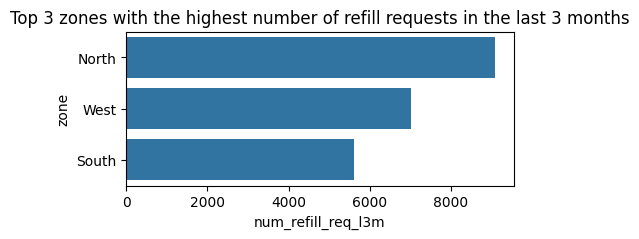

In [ ]:
plt.figure(figsize=(5,2))
sns.barplot(x =top_3_zone,y = top_3_zone.index)
plt.title('Top 3 zones with the highest number of refill requests in the last 3 months')
plt.show()

Q9-Calculate the average number of government checks per warehouse in the last 3 months.

In [ ]:
avg_govt_check_l3m = df.groupby('Ware_house_ID')['govt_check_l3m'].mean()
avg_govt_check_l3m

Ware_house_ID
WH_100000    15.0
WH_100001    17.0
WH_100002    22.0
WH_100003    27.0
WH_100004    24.0
             ... 
WH_124995    30.0
WH_124996    18.0
WH_124997    25.0
WH_124998    30.0
WH_124999    11.0
Name: govt_check_l3m, Length: 25000, dtype: float64

Q10-Determine the most common type of government certification among warehouses.

In [ ]:
most_common_type = df['approved_wh_govt_certificate'].value_counts()
most_common_type

approved_wh_govt_certificate
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: count, dtype: int64

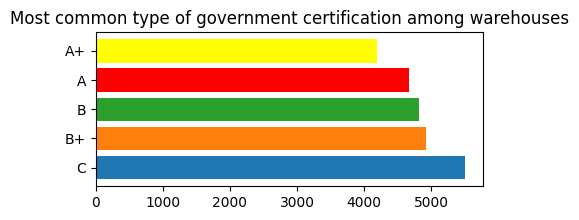

In [ ]:
plt.figure(figsize=(5,2))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', 'red', 'yellow']
plt.barh(y = most_common_type.index, width = most_common_type, color = colors)
plt.title('Most common type of government certification among warehouses')
plt.show()

Q11- What is the correlation between the number of workers and the number of reported storage issues in the last 3 months?

In [ ]:
workers_and_issues = df[['workers_num','storage_issue_reported_l3m']]
correlation = workers_and_issues.corr().loc['workers_num','storage_issue_reported_l3m']
correlation

-0.008672981887991375

#####a Pearson correlation coefficient of -0 indicates a negative linear relationship between the number of workers and reported storage issues, suggesting that an increase in workers may correspond with a decrease in reported storage issues

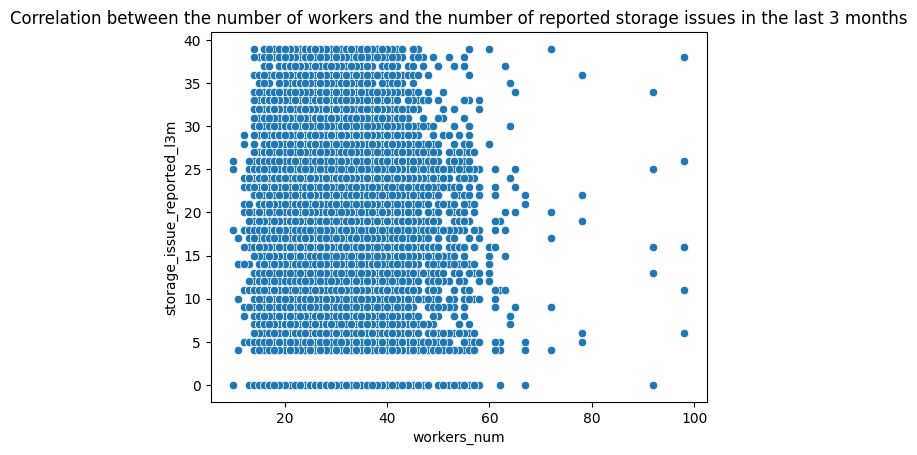

In [ ]:
sns.scatterplot(x='workers_num', y='storage_issue_reported_l3m', data=df)
plt.title('Correlation between the number of workers and the number of reported storage issues in the last 3 months')
plt.show()

Q12-Analyze the relationship between warehouse capacity size and the number of refill requests in the last 3 months.

In [ ]:
capacity_size = df.groupby('WH_capacity_size')['num_refill_req_l3m'].mean()
capacity_size

WH_capacity_size
Large    4.093815
Mid      4.113473
Small    4.028061
Name: num_refill_req_l3m, dtype: float64

Q13-Identify which geographical zone has the highest average number of transport issues in the last year.

In [ ]:
Avg_number = df.groupby('zone')['transport_issue_l1y'].mean()
Avg_number

zone
East     0.790210
North    0.781086
South    0.774599
West     0.762451
Name: transport_issue_l1y, dtype: float64

Q14 - Calculate the average product weight per ton for warehouses that have temperature regulation machinery.

In [ ]:
Avg_product_weight_per_ton = df.groupby('temp_reg_mach')['product_wg_ton'].mean()
Avg_product_weight_per_ton

temp_reg_mach
0    21324.260765
1    23890.774070
Name: product_wg_ton, dtype: float64

  Q15-Determine the top 5 warehouses with the highest number of government checks in the last 3 months and analyze their storage issue reports.

In [ ]:
top_5_warehouse= df.nlargest(5, 'govt_check_l3m')
compare = top_5_warehouse[['Ware_house_ID','govt_check_l3m','storage_issue_reported_l3m']]
compare

,Ware_house_ID,govt_check_l3m,storage_issue_reported_l3m
63,WH_100063,32,20
69,WH_100069,32,9
70,WH_100070,32,17
85,WH_100085,32,18
101,WH_100101,32,8


Q16-Compare the average number of workers in warehouses located in urban areas versus rural areas.

In [ ]:
Avg_no_of_workers = df.groupby('Location_type')['workers_num'].mean()
Avg_no_of_workers

Location_type
Rural    28.950823
Urban    28.872395
Name: workers_num, dtype: float64

Q17-What is the impact of the distance from the hub on the number of transport issues reported?

In [ ]:
issue_reported = df[['transport_issue_l1y','dist_from_hub']]
correlation = issue_reported.corr().loc['transport_issue_l1y','dist_from_hub']
correlation


0.014335793369184967

#####A correlation coefficient of 0.01433 between the distance from the hub and transport issues over the last year means that there is no linear relationship between these two variables. In other words, changes in the distance from the hub do not predict or explain changes in the number of transport issues.

Q18-Analyze the effect of competitor presence in the market on the number of refill requests.

In [ ]:
effect = df[['Competitor_in_mkt','num_refill_req_l3m']]
correlation = effect.corr().loc['Competitor_in_mkt','num_refill_req_l3m']
correlation

0.002984801489494774

##### A correlation of 0.0029 between the competitor in market and number of refill request last 3 months means that there is no linear relationship between these two variables. In other words, changes in the competitors in market do not predict or explain changes in the number of refill request last 3 months.

Q19-Determine if there is a significant difference in the number of storage issues reported between warehouses with and without government certificates.

In [ ]:
df['approved_wh_govt_certificate'].fillna('Not Certified', inplace = True) #filling null value with Not Certified
df['approved_wh_govt_certificate'].isnull().sum()


0

In [ ]:
storage_by_certificate = df.groupby('approved_wh_govt_certificate')['storage_issue_reported_l3m'].count()
count_certified = (df['approved_wh_govt_certificate']!='Not Certified').sum()
count_not_certified =storage_by_certificate.get('Not Certified')
print(storage_by_certificate)
print(count_certified)
print(count_not_certified)

approved_wh_govt_certificate
A                4671
A+               4191
B                4812
B+               4917
C                5501
Not Certified     908
Name: storage_issue_reported_l3m, dtype: int64
24092
908


In [ ]:
difference = count_certified - count_not_certified
print(difference) # difference in the number of storage issues reported between warehouses with and without government certificates.

23184


Q20-Investigate the relationship between warehouse establishment year and the number of breakdowns reported in the last 3 months.

In [ ]:
warehouse = df[['wh_est_year','wh_breakdown_l3m']]
correlation = warehouse.corr().loc['wh_est_year','wh_breakdown_l3m']
correlation

-0.3988007362051897

#####A correlation coefficient of -0.039 between the warehouse establishment year and the number of breakdowns reported in the last 3 months indicates that there is a very weak and practically negligible negative linear relationship between these two variables.

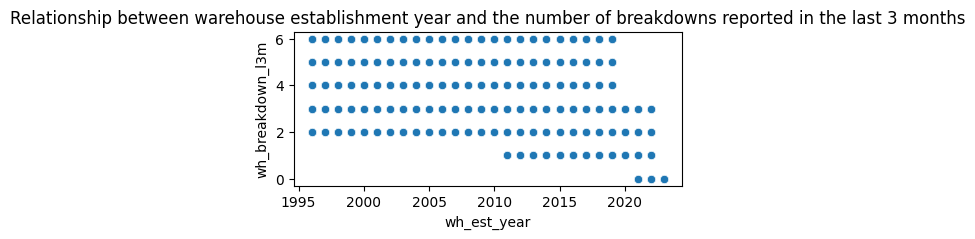

In [ ]:
plt.figure(figsize=(5,2))
sns.scatterplot(x='wh_est_year', y='wh_breakdown_l3m', data=df)
plt.title('Relationship between warehouse establishment year and the number of breakdowns reported in the last 3 months')
plt.show()